In [48]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from pylab import savefig

In [49]:
q4 = pd.read_csv('cleandata.csv')
q4.head(3)

,Unnamed: 0,Unnamed: 0.1,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,30,30,http://www.billboard.com/charts/hot-100/1993-0...,1/16/1993,15,7,Prince And The New Power Generation,7Prince And The New Power Generation,1,19.0,...,2.0,-8.308,1.0,0.036,0.0165,0.00282,0.296,0.573,135.148,4.0
1,31,31,http://www.billboard.com/charts/hot-100/1993-0...,2/13/1993,8,7,Prince And The New Power Generation,7Prince And The New Power Generation,1,8.0,...,2.0,-8.308,1.0,0.036,0.0165,0.00282,0.296,0.573,135.148,4.0
2,32,32,http://www.billboard.com/charts/hot-100/1993-0...,2/20/1993,8,7,Prince And The New Power Generation,7Prince And The New Power Generation,1,8.0,...,2.0,-8.308,1.0,0.036,0.0165,0.00282,0.296,0.573,135.148,4.0


In [50]:
q4['year'] = pd.DatetimeIndex(q4['WeekID']).year
q4['month'] = pd.DatetimeIndex(q4['WeekID']).month
 

In [51]:
q44 = q4[(q4['year'] ==2019)]
q44 

,Unnamed: 0,Unnamed: 0.1,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
816,2304,2304,https://www.billboard.com/charts/hot-100/2019-...,01-05-19,32,(There's No Place Like) Home For The Holidays,Perry Como,(There's No Place Like) Home For The HolidaysP...,1,41.0,...,1.0,0.0316,0.8970,0.00000,0.1330,0.735,78.042,4.0,2019,1
2271,5717,5717,https://www.billboard.com/charts/hot-100/2019-...,2/23/2019,15,A Lot,21 Savage,A Lot21 Savage,1,12.0,...,1.0,0.0860,0.0395,0.00125,0.3420,0.274,145.972,4.0,2019,2
2272,5718,5718,https://www.billboard.com/charts/hot-100/2019-...,3/23/2019,21,A Lot,21 Savage,A Lot21 Savage,1,18.0,...,1.0,0.0860,0.0395,0.00125,0.3420,0.274,145.972,4.0,2019,3
2273,5719,5719,https://www.billboard.com/charts/hot-100/2019-...,3/30/2019,21,A Lot,21 Savage,A Lot21 Savage,1,21.0,...,1.0,0.0860,0.0395,0.00125,0.3420,0.274,145.972,4.0,2019,3
2274,5720,5720,https://www.billboard.com/charts/hot-100/2019-...,04-06-19,22,A Lot,21 Savage,A Lot21 Savage,1,21.0,...,1.0,0.0860,0.0395,0.00125,0.3420,0.274,145.972,4.0,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137557,315578,315578,https://www.billboard.com/charts/hot-100/2019-...,3/16/2019,28,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,25.0,...,0.0,0.1760,0.0521,0.00000,0.0924,0.504,98.043,4.0,2019,3
137558,315579,315579,https://www.billboard.com/charts/hot-100/2019-...,3/23/2019,29,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,28.0,...,0.0,0.1760,0.0521,0.00000,0.0924,0.504,98.043,4.0,2019,3
137559,315580,315580,https://www.billboard.com/charts/hot-100/2019-...,3/30/2019,31,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,29.0,...,0.0,0.1760,0.0521,0.00000,0.0924,0.504,98.043,4.0,2019,3
137560,315581,315581,https://www.billboard.com/charts/hot-100/2019-...,04-06-19,38,ZEZE,Kodak Black Featuring Travis Scott & Offset,ZEZEKodak Black Featuring Travis Scott & Offset,1,31.0,...,0.0,0.1760,0.0521,0.00000,0.0924,0.504,98.043,4.0,2019,4


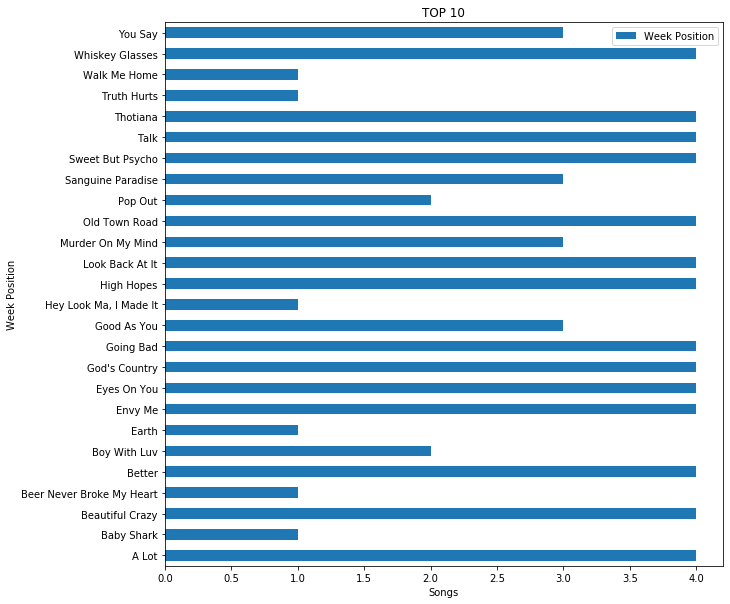

In [52]:
d = q44[(q44['month'] ==5)]
#d=q44.drop(['Unnamed: 0','Unnamed: 0.1','url','spotify_track_popularity','spotify_track_album','artist_genre','loudness','tempo','Peak Position','spotify_genre','spotify_track_id','spotify_track_preview_url','spotify_track_duration_ms','spotify_track_explicit','danceability','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','time_signature'],axis=1)

wpm=d[(d['Week Position'] <=50)]
wpm = wpm[['Week Position','Song']]
MMonth = wpm.groupby(wpm['Song']).count()
MMonth.plot(kind="barh",title="TOP 10",figsize=(10,10))
plt.xlabel('Songs')
plt.ylabel('Week Position')
plt.show()

Text(0, 0.5, 'Songs')

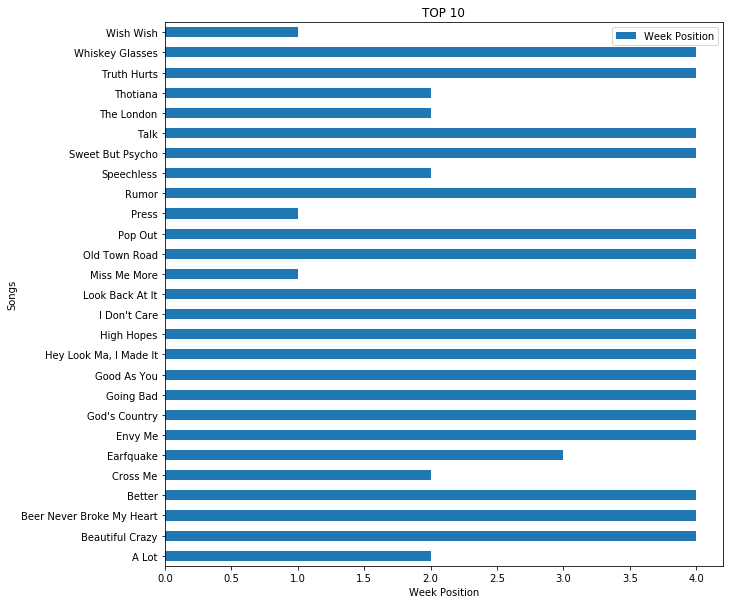

In [53]:
d1 = q44[(q44['month'] ==6)]
#d1=q44.drop(['Unnamed: 0','Unnamed: 0.1','url','spotify_track_popularity','spotify_track_album','artist_genre','loudness','tempo','Peak Position','spotify_genre','spotify_track_id','spotify_track_preview_url','spotify_track_duration_ms','spotify_track_explicit','danceability','energy','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','time_signature'],axis=1)
#d1
wpj=d1[(d1['Week Position'] <=50)]
wpj = wpj[['Week Position','Song']]
JMonth = wpj.groupby(wpj['Song']).count()
JMonth.plot(kind="barh",title="TOP 10",figsize=(10,10))
plt.xlabel('Week Position')
plt.ylabel('Songs')